In this takehome challenge, my goal is to demonstrate understanding of the data science process in exploring and modeling a dataset.  This will be in several steps as instructed.  I will explain the expectations for each part as I go along.  After each part, I will post what the instructions were that I had been given.

### Part 1: Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.


In [44]:
#Import anything that I might use for the EDA.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os
from scipy import stats

In [31]:
#load the file and examine it.
logins = pd.read_json('logins.json')
logins

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [25]:
logins.dtypes

login_time    datetime64[ns]
dtype: object

In [32]:
#Aggregating based on 15 minute time intervals
logins = logins.resample("15min", on="login_time").count()
logins

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [33]:
#Rearrange the dataframe
logins.index.name = 'login'
logins.reset_index(inplace=True)
logins.rename({'login_time':'count'}, axis=1, inplace=True)
logins

,login,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
...,...,...
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7


In [35]:
#I want to look for patterns on the logins, like patterns with days of the week  or time of day.  First I need to extract that information.
logins['hour'] = logins['login'].dt.hour
logins["day"] = logins['login'].dt.day_name()

#giving AM/PM labels
am_pm = lambda row: "AM" if row in range(0,12) else "PM"
logins["AM-PM"] = logins["hour"].apply(am_pm)

logins

,login,count,hour,day,AM-PM
0,1970-01-01 20:00:00,2,20,Thursday,PM
1,1970-01-01 20:15:00,6,20,Thursday,PM
2,1970-01-01 20:30:00,9,20,Thursday,PM
3,1970-01-01 20:45:00,7,20,Thursday,PM
4,1970-01-01 21:00:00,1,21,Thursday,PM
...,...,...,...,...,...
9783,1970-04-13 17:45:00,5,17,Monday,PM
9784,1970-04-13 18:00:00,5,18,Monday,PM
9785,1970-04-13 18:15:00,2,18,Monday,PM
9786,1970-04-13 18:30:00,7,18,Monday,PM


In [36]:
#Check to see the frequency of each day.
logins_day = logins.groupby("day").sum()[["count"]]

#Average will be easier to compare.
logins_day['average'] = logins.groupby("day").mean()[["count"]]


In [37]:
logins_day

,count,average
day,,
Friday,15208,10.561111
Monday,8823,6.213380
Saturday,19377,13.456250
Sunday,18167,12.615972
Thursday,11960,8.794118
Tuesday,9268,6.895833
Wednesday,10339,7.692708


In [38]:
#Check to see frequency of each hour of the day.
logins_hour = logins.groupby("hour").sum()[["count"]]

#getting average hourly logins per hour of day
logins_hour["average"] = logins.groupby("hour").mean()[["count"]]

logins_hour

,count,average
hour,,
0,5993,14.688725
1,6317,15.482843
2,5800,14.215686
3,4831,11.840686
4,5034,12.338235
5,2945,7.218137
6,1138,2.789216
7,815,1.997549
8,818,2.004902


In [40]:
#Compare morning vs evening of each day
logins_day_am_pm = logins.groupby(["day", "AM-PM"]).sum()[["count"]]

logins_day_am_pm['average'] = logins.groupby(["day", "AM-PM"]).mean()[["count"]]

logins_day_am_pm

count    average
day       AM-PM                  
Friday    AM      5924   8.227778
          PM      9284  12.894444
Monday    AM      3905   5.423611
          PM      4918   7.025714
Saturday  AM     10217  14.190278
          PM      9160  12.722222
Sunday    AM     10351  14.376389
          PM      7816  10.855556
Thursday  AM      5153   7.668155
          PM      6807   9.893895
Tuesday   AM      3961   5.894345
          PM      5307   7.897321
Wednesday AM      4570   6.800595
          PM      5769   8.584821

Now to plot some of these results to get a good visual and interpret.

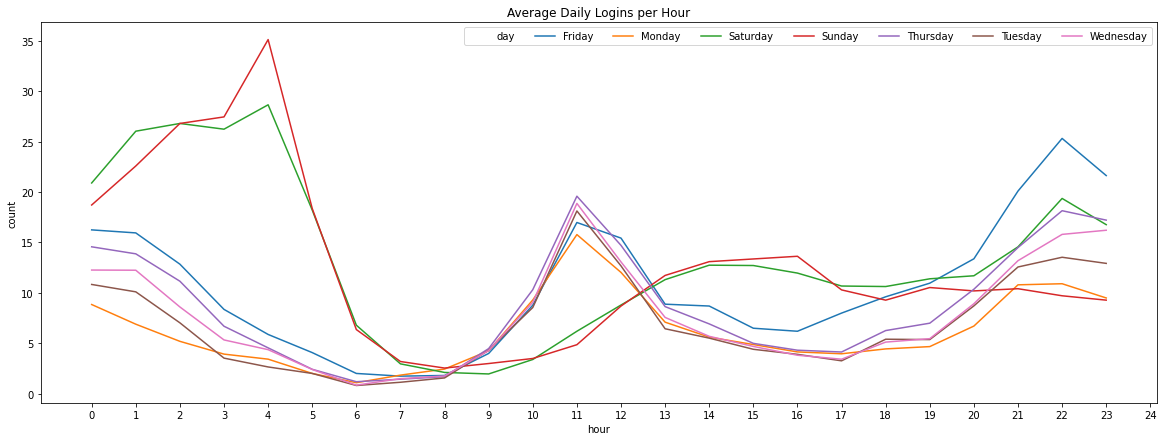

In [43]:
logins_total = logins.groupby(["hour", "day"]).mean().reset_index()

f, axes = plt.subplots(figsize=(20,7))
ax = sns.lineplot(x="hour", y="count", data=logins_total, hue="day")
ax.legend(loc="upper right", ncol=8)
ax.set(title="Average Daily Logins per Hour")
plt.xticks(range(0,25))

plt.show()

Logins are noticeably greater on the weekends(Friday-Sunday), with the lowest being Monday, steadily increasing each day.  Also, comparing how the time of day logins occur for certain days, Saturday and Sunday follow a similar pattern, peaking in the early morning at 4 AM.  The other days of the week all have a peak at midday around 11 AM and another in the eventing around 10 PM.

### Part 2: Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.<br>
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?<br>
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:<br>
a. how you will implement the experiment<br>
b. what statistical test(s) you will conduct to verify the significance of the
observation<br>
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


1. In order to measure the success of this experiment, drivers would need to be tracked on where they spend the highest percentage of their time during the weekends, since it can be assume the driver partners focus most of their time in Gotham at night and Metropolis during the weekdays. This can be done by first tracking where the drivers were located and their driving patterns before implementing any changes to get a baseline guess of percentages, then comparing it to how it changes after the experiment.
2. The experiment will be implemented taking a large sample size of the drivers (the larger the better, if the sample size is large enough, according to the central limit theorem, a large sample mean will accurately represent the population mean). 
After calculating the percentage of time they spent in each city on the weekends, begin reimbursing the toll costs.  After a set period of weekends (the same as the amount collected before), once again calculate the percentage of time spent in each city on the weekends.
The results will then be determined if there is a significance by using hypothesis testing to find the p-value at a given significance, say 95%.  The null hypothesis will be that reimbursing the tolls had no significant change in city location, and the alternative hypothesis is that reimbursing the tolls did have a significant change.  If it is determined that the p-value is very low (less than 0.05 for 95% significance), then it can be assumed that the change in percentages from having a toll to not having a toll is significant and the null hypothesis can be rejected.  This would show that drivers would be spending more time in each city, and it would be recommended that the experiment works.
Caveats would be that this only works on weekends and does not assume any special occassions, like holidays.  Also the money lost by reimbursing tolls should be compared to the money gained by the partners spending more time in each city, and the relative importance would need to be discussed.  This would take further experimentation and research.

### Part 3: Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account inJanuary 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).<br>
Data description<br>
● city: city this user signed up in<br>
● phone: primary device for this user<br>
● signup_date: date of account registration; in the form ‘YYYYMMDD’<br>
● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’<br>
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup<br>
● avg_rating_by_driver: the rider’s average rating over all of their trips<br>
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips<br>
● surge_pct: the percent of trips taken with surge multiplier > 1 <br>
● avg_surge: The average surge multiplier over all of this user’s trips<br>
● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up<br>
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise<br>
● weekday_pct: the percent of the user’s trips occurring during a weekday

#### Clean and explore the data

First we will open the data, explore and clean it.

In [82]:
df = pd.read_json('ultimate_data_challenge.json')
df.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [84]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


Now do do some clearning, which will first be giving values for the rating of the driver and the ratings by the driver.  I will drop the null values for phone.

In [85]:
df['avg_rating_by_driver'].describe()

count    49799.000000
mean         4.778158
std          0.446652
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [86]:
#Fill the missing values by driver with the mean, since the median would not take into account anything less than a perfect rating.
avg_rating= df['avg_rating_by_driver'].mean()
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(value=avg_rating)

In [87]:
df['avg_rating_of_driver'].describe()

count    41878.000000
mean         4.601559
std          0.617338
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [88]:
#Fill the missing values by driver with the median, to ignore the outliers that might occur with the mean.
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(value=4.9)

In [89]:
df = df.drop(df[df.phone.isna()==True].index,axis=0)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [91]:
#The date needs to be converted from a string to a datetime
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [92]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

This information does not include what the date was when this data was taken other than saying that the data was pulled several months later, so it is impossible to accurately determine active users by past 30 days.  To get the closest assumption of this, I am going to take the date of the latest trip and consider that the "current date" and then see how many users have been active 30 days prior to that.

In [94]:
#set current date 
current_date = df['last_trip_date'].max()

In [95]:
#find if user qualifies as active
df['active'] = df['last_trip_date'].apply(lambda date: 0 if (current_date-date).days>30 else 1)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [96]:
df['active'].value_counts()

0    30933
1    18671
Name: active, dtype: int64

In [97]:
currently_active_percent = 18804/50000 * 100
currently_active_percent

37.608000000000004

37.6% of users can still be considered active.  Now let's do some EDA to see any patterns.

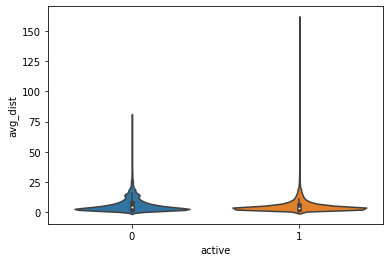

In [98]:
#Compare active to distance travelled
sns.violinplot(data=df,x='active',y='avg_dist')

In [99]:
pd.pivot_table(df,index='active',aggfunc={'avg_dist':['mean','std']})

avg_dist          
            mean       std
active                    
0       6.190725  6.184010
1       5.113930  4.617779

Active users travel less distance than inactive users.  What about number of trips in first 30 days?

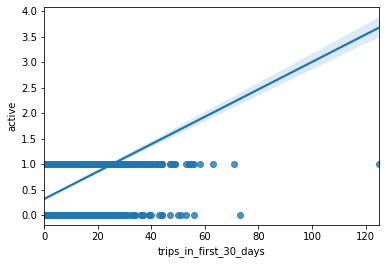

In [100]:
sns.regplot(y=df['active'], x=df['trips_in_first_30_days'], fit_reg = True)


There seems to be one large outlier, but overall there is a positive correlation between number of trips in first 30 days and if they are still active.  Rating can also be informative.

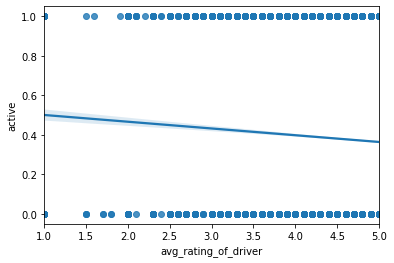

In [101]:
sns.regplot(y=df['active'], x=df['avg_rating_of_driver'], fit_reg = True)


This is different than expected. There is a slight negative correlation with whether they are active and if they give good ratings.  What about the ratings by the user.

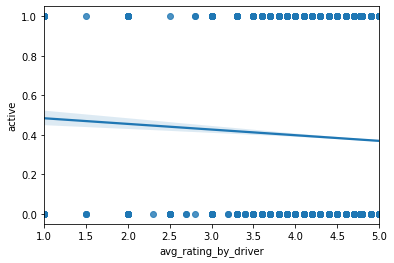

In [102]:
sns.regplot(y=df['active'], x=df['avg_rating_by_driver'], fit_reg = True)


Another surprising negative correlation.  Lets model the data to see if we can make predictions.

#### Building a Model

I am going to use Random Forest Classifier here because I am fond of tree modeling and ensemble methods.  I am going to use all variables except for phone number as predictors and whether or not they are active as the dependent variable.  First I need to prepare the data by splitting it and giving the categorical variables dummies so they can be used to model. 

In [81]:
from sklearn.model_selection import train_test_split

In [103]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='active'),df.active,test_size=0.3, random_state=42)


In [104]:
X_train.shape, X_test.shape

((34722, 12), (14882, 12))

In [105]:
y_train.shape, y_test.shape

((34722,), (14882,))

In [106]:
#Get dummies for each categorical variable
train_dummy_city = pd.get_dummies(X_train['city'],drop_first = True)
train_dummy_city

,King's Landing,Winterfell
48436,0,1
42338,0,1
20178,0,0
10096,0,1
34092,1,0
...,...,...
11365,0,1
45079,0,1
38447,0,1
870,0,1


In [108]:
train_dummy_phone = pd.get_dummies(X_train['phone'],drop_first = True)
train_dummy_phone

,iPhone
48436,1
42338,1
20178,1
10096,0
34092,1
...,...
11365,1
45079,1
38447,1
870,1


In [109]:
train_dummy_black_user = pd.get_dummies(X_train['ultimate_black_user'],drop_first = True)
train_dummy_black_user

,True
48436,0
42338,0
20178,1
10096,0
34092,0
...,...
11365,0
45079,0
38447,0
870,0


In [110]:
#Now add the dummies to the X-train and remove the categorical variables.
X_train_dummies = pd.concat([X_train, train_dummy_city, train_dummy_phone, train_dummy_black_user],axis=1)
X_train_dummies

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,King's Landing,Winterfell,iPhone,True
48436,Winterfell,0,2014-01-31,4.9,1.00,2014-06-01,iPhone,0.0,False,0.0,1.26,5.0,0,1,1,0
42338,Winterfell,1,2014-01-29,5.0,1.00,2014-02-15,iPhone,0.0,False,100.0,3.19,5.0,0,1,1,0
20178,Astapor,4,2014-01-22,4.7,1.05,2014-05-29,iPhone,11.8,True,70.6,2.08,4.5,0,0,1,1
10096,Winterfell,7,2014-01-26,4.0,1.02,2014-04-28,Android,6.3,False,56.3,9.00,4.6,0,1,0,0
34092,King's Landing,1,2014-01-11,4.9,1.25,2014-06-07,iPhone,66.7,False,33.3,2.63,4.7,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11365,Winterfell,0,2014-01-12,5.0,1.00,2014-04-20,iPhone,0.0,False,50.0,2.46,5.0,0,1,1,0
45079,Winterfell,0,2014-01-28,5.0,1.00,2014-03-29,iPhone,0.0,False,100.0,13.26,5.0,0,1,1,0
38447,Winterfell,6,2014-01-09,3.4,1.00,2014-04-11,iPhone,0.0,False,50.0,0.55,4.3,0,1,1,0
870,Winterfell,1,2014-01-07,4.0,1.00,2014-01-08,iPhone,0.0,False,100.0,14.89,5.0,0,1,1,0


In [111]:
X_train = X_train_dummies.drop(['city','phone','ultimate_black_user'], axis=1)
X_train.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,King's Landing,Winterfell,iPhone,True
48436,0,2014-01-31,4.9,1.00,2014-06-01,0.0,0.0,1.26,5.0,0,1,1,0
42338,1,2014-01-29,5.0,1.00,2014-02-15,0.0,100.0,3.19,5.0,0,1,1,0
20178,4,2014-01-22,4.7,1.05,2014-05-29,11.8,70.6,2.08,4.5,0,0,1,1
10096,7,2014-01-26,4.0,1.02,2014-04-28,6.3,56.3,9.00,4.6,0,1,0,0
34092,1,2014-01-11,4.9,1.25,2014-06-07,66.7,33.3,2.63,4.7,1,0,1,0


The training set is ready, now to do the same with the testing set

In [112]:
test_dummy_city = pd.get_dummies(X_test['city'],drop_first = True)
test_dummy_city

,King's Landing,Winterfell
32027,0,1
21429,0,1
12723,0,1
19995,1,0
735,1,0
...,...,...
9464,0,1
19200,0,1
41745,1,0
14678,1,0


In [113]:
test_dummy_phone = pd.get_dummies(X_test['phone'],drop_first = True)
test_dummy_phone

,iPhone
32027,0
21429,1
12723,0
19995,1
735,0
...,...
9464,0
19200,1
41745,0
14678,1


In [114]:
test_dummy_black_user = pd.get_dummies(X_test['ultimate_black_user'],drop_first = True)
test_dummy_black_user

,True
32027,0
21429,0
12723,0
19995,0
735,0
...,...
9464,0
19200,0
41745,1
14678,1


In [115]:
X_test_dummies = pd.concat([X_test, test_dummy_city, test_dummy_phone, test_dummy_black_user],axis=1)
X_test_dummies

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,King's Landing,Winterfell,iPhone,True
32027,Winterfell,0,2014-01-27,5.0,1.00,2014-05-19,Android,0.0,False,66.7,17.95,5.0,0,1,0,0
21429,Winterfell,4,2014-01-16,4.5,1.00,2014-03-26,iPhone,0.0,False,100.0,14.48,4.8,0,1,1,0
12723,Winterfell,2,2014-01-18,5.0,1.25,2014-01-19,Android,50.0,False,0.0,2.33,4.0,0,1,0,0
19995,King's Landing,2,2014-01-25,4.3,1.07,2014-06-20,iPhone,7.1,False,78.6,2.51,4.8,1,0,1,0
735,King's Landing,3,2014-01-16,4.7,1.00,2014-06-27,Android,0.0,False,55.6,2.80,4.9,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9464,Winterfell,4,2014-01-06,4.5,1.00,2014-01-11,Android,0.0,False,100.0,8.74,5.0,0,1,0,0
19200,Winterfell,0,2014-01-22,4.0,1.00,2014-06-29,iPhone,0.0,False,33.3,2.01,5.0,0,1,1,0
41745,King's Landing,1,2014-01-15,4.1,1.06,2014-06-28,Android,11.1,True,66.7,14.23,4.4,1,0,0,1
14678,King's Landing,16,2014-01-23,5.0,1.03,2014-06-28,iPhone,8.5,True,66.0,2.42,4.9,1,0,1,1


In [116]:
X_test = X_test_dummies.drop(['city','phone','ultimate_black_user'], axis=1)
X_test.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,King's Landing,Winterfell,iPhone,True
32027,0,2014-01-27,5.0,1.00,2014-05-19,0.0,66.7,17.95,5.0,0,1,0,0
21429,4,2014-01-16,4.5,1.00,2014-03-26,0.0,100.0,14.48,4.8,0,1,1,0
12723,2,2014-01-18,5.0,1.25,2014-01-19,50.0,0.0,2.33,4.0,0,1,0,0
19995,2,2014-01-25,4.3,1.07,2014-06-20,7.1,78.6,2.51,4.8,1,0,1,0
735,3,2014-01-16,4.7,1.00,2014-06-27,0.0,55.6,2.80,4.9,1,0,0,0


We cannot model with dates, so they will be dropped

In [120]:
X_train = X_train.drop(['signup_date', 'last_trip_date'], axis=1)
X_train.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,King's Landing,Winterfell,iPhone,True
48436,0,4.9,1.00,0.0,0.0,1.26,5.0,0,1,1,0
42338,1,5.0,1.00,0.0,100.0,3.19,5.0,0,1,1,0
20178,4,4.7,1.05,11.8,70.6,2.08,4.5,0,0,1,1
10096,7,4.0,1.02,6.3,56.3,9.00,4.6,0,1,0,0
34092,1,4.9,1.25,66.7,33.3,2.63,4.7,1,0,1,0


In [121]:
X_test = X_test.drop(['signup_date', 'last_trip_date'], axis=1)
X_test.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,King's Landing,Winterfell,iPhone,True
32027,0,5.0,1.00,0.0,66.7,17.95,5.0,0,1,0,0
21429,4,4.5,1.00,0.0,100.0,14.48,4.8,0,1,1,0
12723,2,5.0,1.25,50.0,0.0,2.33,4.0,0,1,0,0
19995,2,4.3,1.07,7.1,78.6,2.51,4.8,1,0,1,0
735,3,4.7,1.00,0.0,55.6,2.80,4.9,1,0,0,0


Now to model with Random Forest Classifier. Both partial and full data will be analyzed, and GridSearchCV will be run to find the optimal hyperparameters. The hyperparameters used are:<br>
Number of estimators: 100, 200, 300, 400, 500<br>
Max depth: 10, 30, 50<br>
Max features: auto, sqrt, log2<br>

In [117]:
#Load models and scoring
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Import scoring methods for the models
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import classification_report

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [122]:
rf = RandomForestClassifier()
param_rf= {'n_estimators':[100,200,300,400,500], 'max_depth':[10,30,50],'max_features':['auto','sqrt','log2']}

gs = GridSearchCV(rf, param_rf, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 30, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [123]:
gs.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500}

In [124]:
#Run the modeling with the best parameters
rf_gs = RandomForestClassifier(n_estimators=500, max_features='auto', max_depth=10)
model_rf = rf_gs.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score

0.7845719661335842

Lets run more scoring other than accuracy to see how well it does.

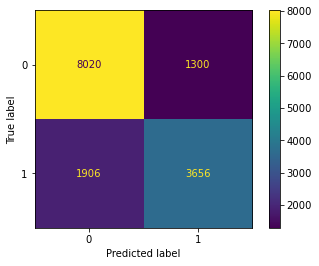

In [125]:
confusion_matrix = plot_confusion_matrix(model_rf, X_test, y_test)
confusion_matrix

In [126]:
#Create a function for plotting ROC curve that can be used multiple times.
def plot_roc_curve(y_test, y_pred_prob, title, label=None):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title(title,fontsize=15)
    plt.show()

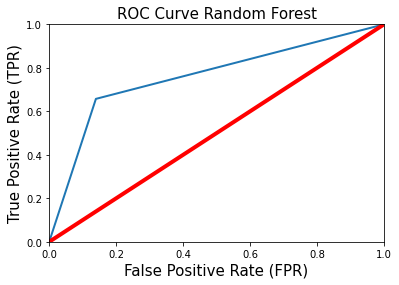

In [131]:
y_pred_prob = rf_gs.predict_proba(X_test)[:,1]
plot_roc_curve(y_test,y_pred,'ROC Curve Random Forest')

In [129]:
#Calculate the area under the curve.
roc_score= roc_auc_score(y_test, y_pred_prob)
print("AUC: ", roc_score)

AUC:  0.8518163565457202


In [130]:
class_rep= classification_report(y_test, y_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      9320
           1       0.74      0.66      0.70      5562

    accuracy                           0.78     14882
   macro avg       0.77      0.76      0.76     14882
weighted avg       0.78      0.78      0.78     14882



Text(0.5, 1.0, 'Feature Importance for Random Forest')

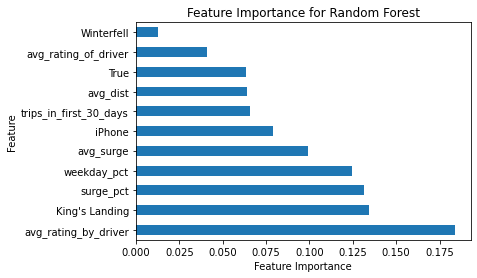

In [133]:
#It's important to find feature imporance as well.
feat_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title("Feature Importance for Random Forest")

The model has 78% accuracy, which is adequate, but it might be worth fine tuning more hyperparameters or trying different models. The classifcation report gives a more thorough description of the model performance, and the scores are good but not great. Feature importance here is very useful in possibly determining the next steps that should be taken.

The rating by driver was the most important in determining how well the model predicted.  Giving the drivers good customers likely improves the experience for everyone, so putting more effort into the driver experience, possibly by incentives or being able to select customers based on their performance might help.  

More time should be taken to compare the cities, since King's Landing made a large difference than the other cities.  Do more research on what is making King's Landing an important city and what they are doing that is different than the others.

Spend more time promoting using surge and working on the weekdays would also be recommended.